In [11]:
from common import *
disable_fig_save = False 
save_loc = 'plots'
save_prefix="pathfinding"
config_common(disable_fig_save=disable_fig_save, save_loc=save_loc, save_prefix=save_prefix)
from colors import *

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import warnings

%config InlineBackend.figure_format = 'svg'

from os import path
from typing import Dict, List, Set

import matplotlib.ticker as mtick
import matplotlib as mpl
from scipy.stats.mstats import gmean
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, ScalarFormatter, LogLocator)
import matplotlib.patches as patches
import matplotlib.patches as mpatches
from matplotlib import rc

import seaborn as sns

In [13]:
init_notebook()
figsize = (7,1.65)
fontsize = 11

In [14]:
dataf = "../../data/map.btree.csv"

In [15]:
!sha256sum $dataf

607d3d4f78e5d78afa207b436342bee19b0cf73239d85e276c8a5c437d053e0a  ../../data/map.btree.csv


In [16]:
df = pd.read_csv(dataf, index_col=None)
df = df.set_index('operation')
df

,pmdk,snapshot
operation,,
insert,1.491580,0.9389
delete,2.133221,0.5256
read,0.293555,0.0842


In [17]:
pmdk_col = df['pmdk']
df_norm = df.copy(deep=True)
for col in df:
    df_norm[col] = df[col]/pmdk_col
df_norm

,pmdk,snapshot
operation,,
insert,1.0,0.629467
delete,1.0,0.246388
read,1.0,0.286829


In [18]:
Fig.config(12, (8, 2))

Plot saved as `plots/pathfinding/map.btree.png`

Plot saved as `plots/pathfinding/map.btree.png`

Using pdfcrop on `plots/pathfinding/map.btree.png` with command `pdfcrop plots/pathfinding/map.btree.pdf plots/pathfinding/map.btree.pdf`

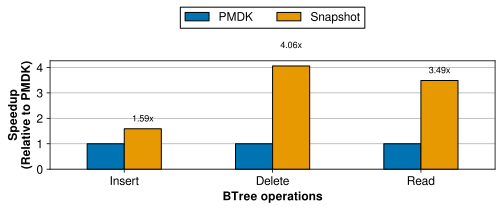

In [22]:
plt.rcParams["font.family"] = "freesans"
speedup = 1/df_norm
speedup = capitalize_index(speedup)
ax = rename_cols(speedup, {'pmdk': u'PMDK', 'snapshot': u'Snapshot', 'msync': 'msync'}).plot.bar(**Fig.get_kwargs())
f = Fig(ax)
# ax.set_ylim((0, 1.9))

f.fmt_legend()
# f.fmt_label('YCSB benchmarks', 'Relative performance')
f.fmt_label('BTree operations', 'Speedup\n(Relative to PMDK)')
f.add_bar_labels([False, True], precision=2, fontsize=fontsize-2, over_fig=False, alpha=0)
f.xrot(rot=0)
f.fmt_grid(axis='y')
ax.set_yticks(np.arange(0, 4.1, 1))
save_fig('map.btree')

In [20]:
df_norm

,pmdk,snapshot
operation,,
insert,1.0,0.629467
delete,1.0,0.246388
read,1.0,0.286829
